# Support Vector Classifier

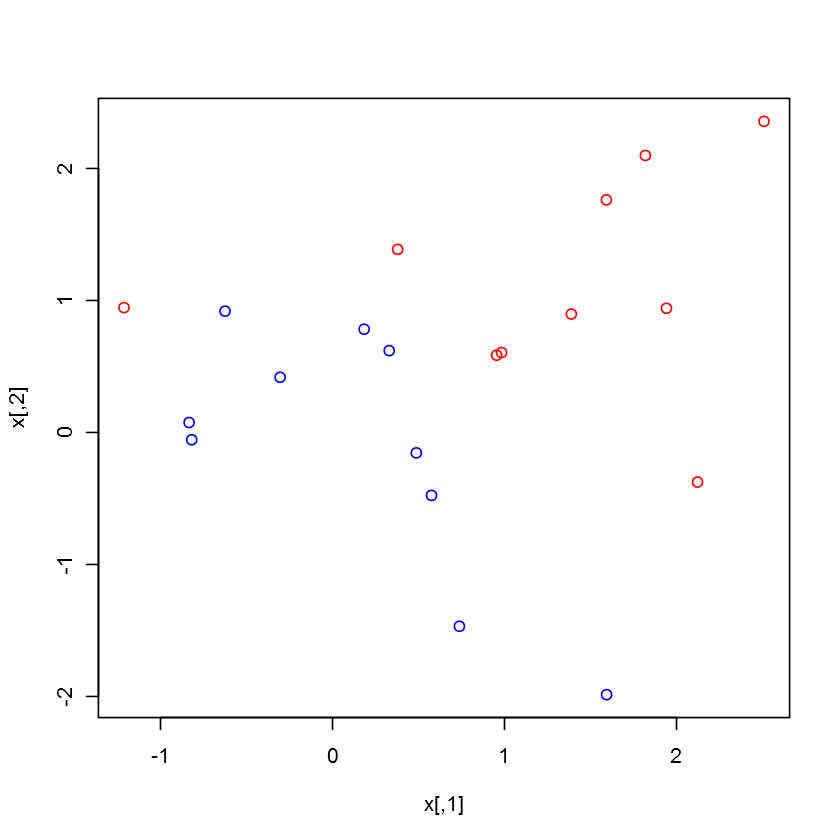

In [10]:
# Prepare nonlinearly separable classes
set.seed(1)
x=matrix(rnorm(20*2), ncol=2)
y=c(rep(-1,10), rep(1,10))
x[y==1,]=x[y==1,] + 1
plot(x, col=(3-y))

# Test data
xtest=matrix(rnorm(20*2), ncol=2)
ytest=sample(c(-1,1), 20, rep=TRUE)
xtest[ytest==1,]=xtest[ytest==1,] + 1

# Transform data into factors
dat=data.frame(x=x, y=as.factor(y))
testdat=data.frame(x=xtest, y=as.factor(ytest))


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




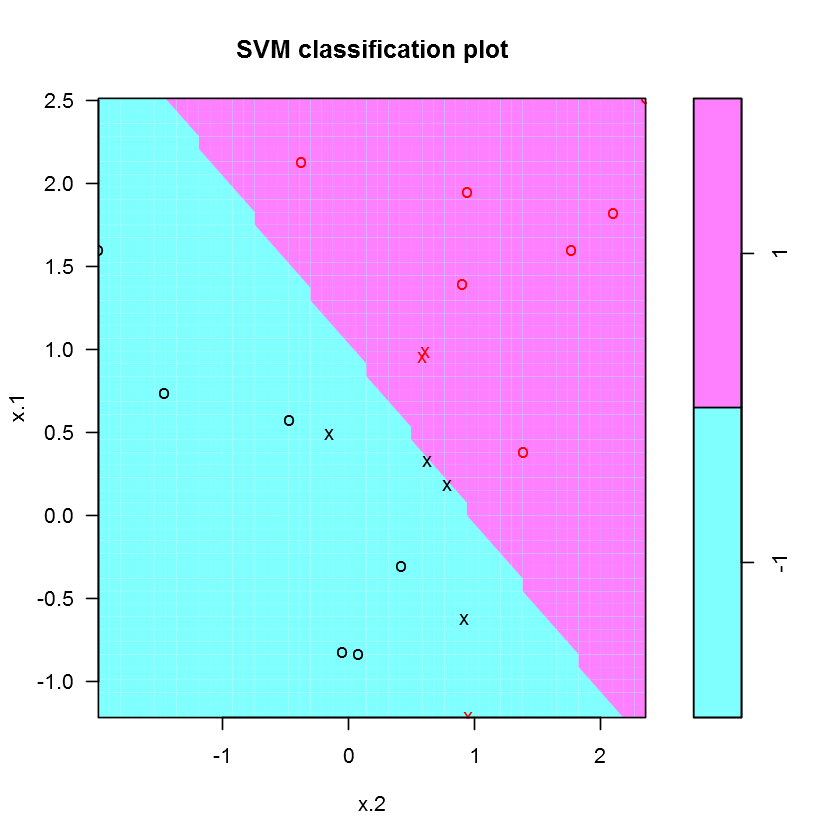

In [11]:
library(e1071)
svmfit=svm(y~., data=dat, kernel="linear", cost=10,scale=FALSE)
plot(svmfit, dat)

summary(svmfit)
# Get the index of the support vectors
#svmfit$index

# Small C makes the cost of misclassificaiton low, thus more support vectors.
# Large C makes the cost of misclassification high, thus less support vectors.
#svmfit=svm(y~., data=dat, kernel="linear", cost=0.1,scale=FALSE)
#svmfit$index
#plot(svmfit, dat)

In [35]:
# Choose the cost with CV
set.seed(1)
tune.out=tune(svm,y~.,data=dat,kernel="linear",
              ranges=list(cost=c(0.001, 0.01, 0.1, 1,5,10,100)))
summary(tune.out)
bestmod=tune.out$best.model
summary(bestmod)

ypred=predict(bestmod,testdat)
table(predict=ypred, truth=testdat$y)
#plot(svmfit, dat)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.28 

- Detailed performance results:
   cost     error dispersion
1 1e-03 0.5000000 0.10061539
2 1e-02 0.3366667 0.08951171
3 1e-01 0.2800000 0.07062333
4 1e+00 0.2866667 0.06703601
5 5e+00 0.2866667 0.06703601
6 1e+01 0.2866667 0.06703601
7 1e+02 0.2866667 0.06703601



Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  210

 ( 97 50 63 )


Number of Classes:  3 

Levels: 
 0 1 2




       truth
predict -1  1
      0  0  0
      1 11  9
      2  0  0

# Support Vector Machine

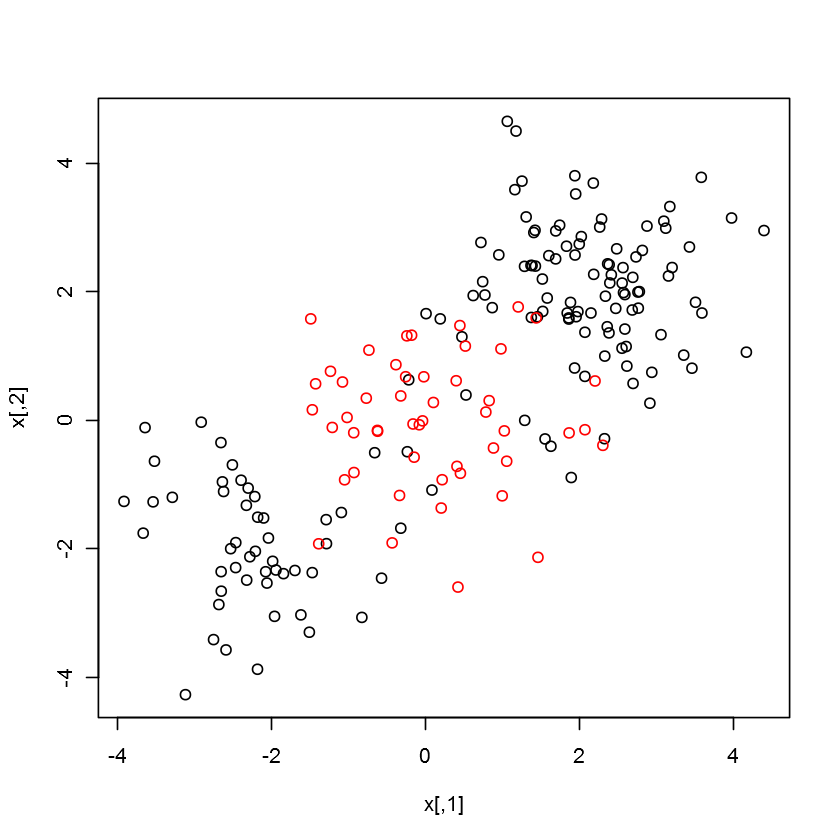

In [22]:
set.seed(1)
x=matrix(rnorm(200*2), ncol=2)
x[1:100,]=x[1:100,]+2
x[101:150,]=x[101:150,]-2
y=c(rep(1,150),rep(2,50))
dat=data.frame(x=x,y=as.factor(y))
plot(x, col=y)
train=sample(200,100)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  37

 ( 17 20 )


Number of Classes:  2 

Levels: 
 1 2




    pred
true  1  2
   1 56 21
   2 18  5

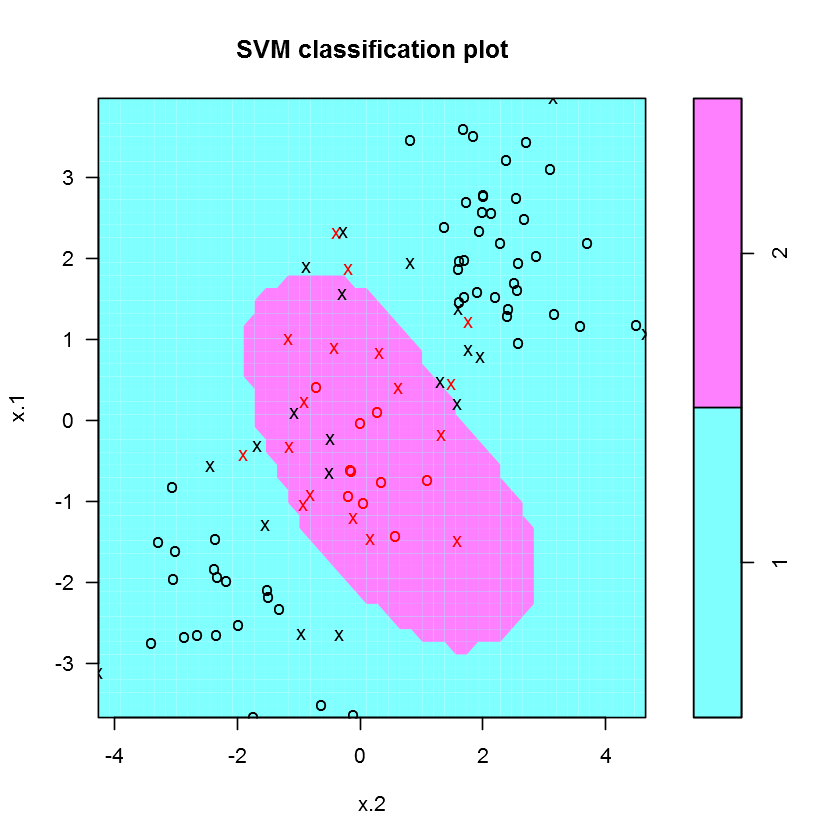

In [26]:
svmfit=svm(y~., data=dat[train,], kernel="radial",  gamma=1, cost=1)
plot(svmfit, dat[train,])
summary(svmfit)

# A higher cost will overfit the data to lower the number of support vectors
#svmfit=svm(y~., data=dat[train,], kernel="radial",gamma=1,cost=1e5)
#plot(svmfit,dat[train,])

set.seed(1)
# kernel = "polynomial" is also possible. Replace gamma by degree.
tune.out=tune(svm, y~., data=dat[train,], kernel="radial", 
              ranges=list(cost=c(0.1,1,10,100,1000),gamma=c(0.5,1,2,3,4)))
#summary(tune.out)
table(true=dat[-train,"y"], pred=predict(tune.out$best.model,newx=dat[-train,]))

# ROC Curves

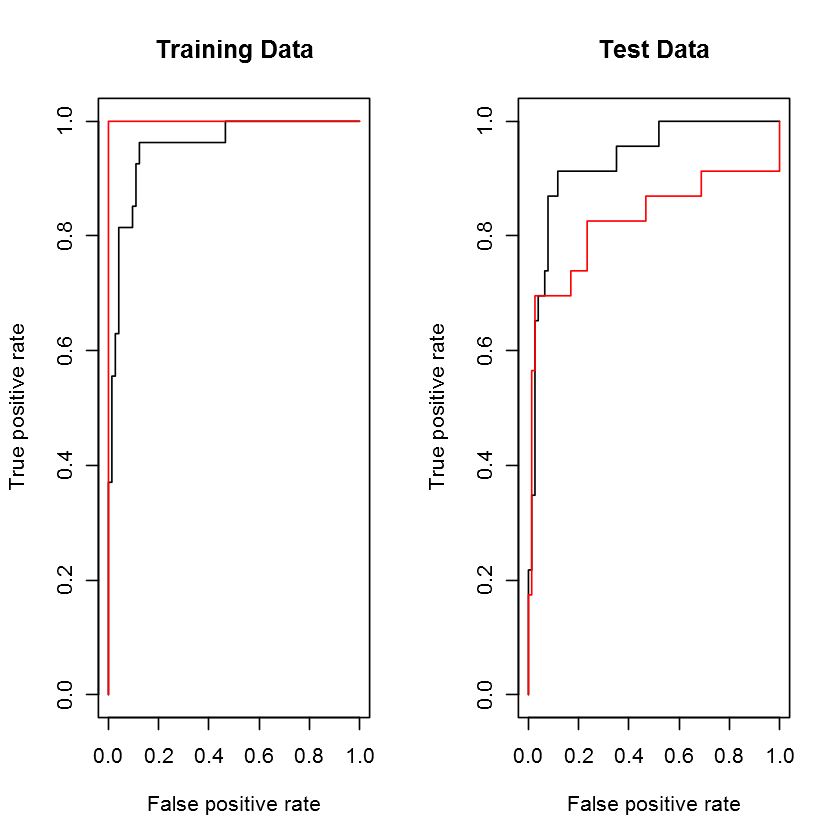

In [32]:
library(ROCR)
rocplot=function(pred, truth, ...){
    predob = prediction(pred, truth)
    perf = performance(predob, "tpr", "fpr")
    plot(perf,...)}

par(mfrow=c(1,2))
svmfit.opt=svm(y~., data=dat[train,], kernel="radial",gamma=2, cost=1,decision.values=T)
fitted=attributes(predict(svmfit.opt,dat[train,],decision.values=TRUE))$decision.values
rocplot(fitted,dat[train,"y"],main="Training Data")
svmfit.flex=svm(y~., data=dat[train,], kernel="radial",gamma=50, cost=1, decision.values=T)
fitted=attributes(predict(svmfit.flex,dat[train,],decision.values=T))$decision.values
rocplot(fitted,dat[train,"y"],add=T,col="red")

fitted=attributes(predict(svmfit.opt,dat[-train,],decision.values=T))$decision.values
rocplot(fitted,dat[-train,"y"],main="Test Data")
fitted=attributes(predict(svmfit.flex,dat[-train,],decision.values=T))$decision.values
rocplot(fitted,dat[-train,"y"],add=T,col="red")

# SVM with Multiple Classes

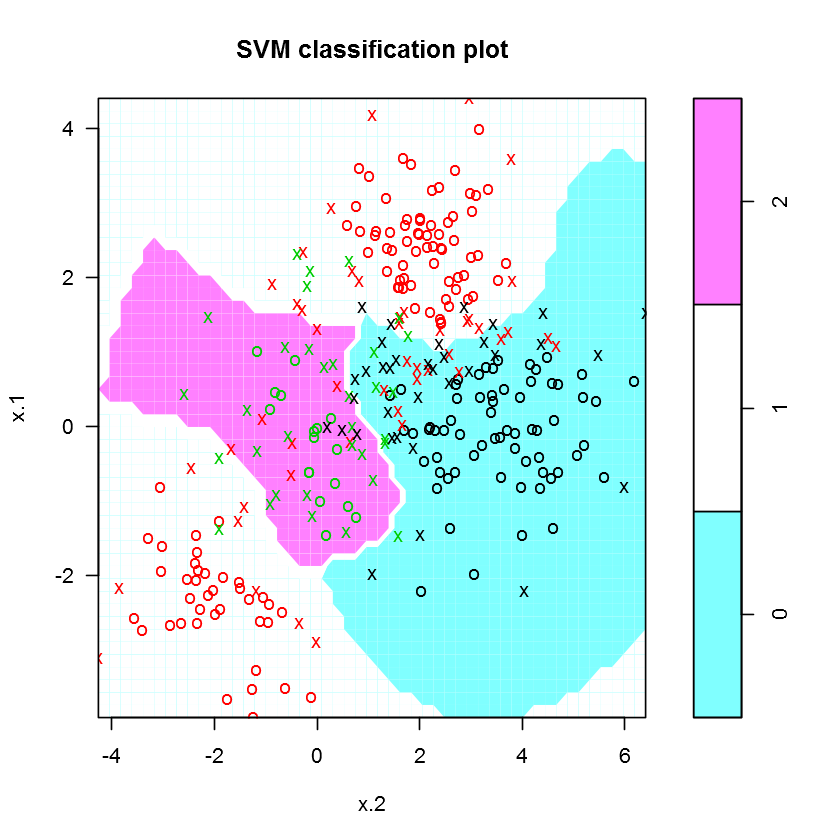

In [34]:
set.seed(1)
x=rbind(x, matrix(rnorm(50*2), ncol=2))
y=c(y, rep(0,50))
x[y==0,2]=x[y==0,2]+2
dat=data.frame(x=x, y=as.factor(y))
#plot(x,col=(y+1))

svmfit=svm(y~., data=dat, kernel="radial", cost=10, gamma=1)
plot(svmfit, dat)